## Hands-on Activity 5.1 | Data Visualization using Python

#### Objective(s):

This activity aims to demonstrate how to use different data visualization techniques to present the analysis

#### Intended Learning Outcomes (ILOs):

* Demonstrate how to use matplotlib and seaborn to create data visualization
* Use choropleth to create geographical plotting of data

#### Resources:
* Jupyter Notebook

####  Tasks:

1. Use the covid dataset in Hands-on Activity 3.3.
2. Use matplotlib and seaborn to visualize the Exploratory Data Analysis (EDA) of the covid dataset
3. Interpret the graphs and charts used in Exploratory Data Analysis.
4. Use choropleth to plot the data in geographical settings.
5. Interpret visualization using choropleth.


# EDA 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Module 5 Activities/Case_Information.csv')


In [6]:
#preprocessing

mean_age = int(data.age.mean())
data.age = data.age.fillna(mean_age)
data.age = data.age.astype(int)
data.region = data.region.astype(str)

# rows with NA in their pregant column are Men, so replace the na with 'NO'
data['pregnant'] = data['pregnant'].fillna('No')

# rows with NA in the column of home_quarantined will be given the value of 
# the majority value, which is "Yes"
data['home_quarantined'] = data['home_quarantined'].fillna('Yes')

data.head()

,case_id,age,age_group,sex,date_announced,date_recovered,date_of_death,status,date_announced_as_removed,province,muni_city,health_status,home_quarantined,date_of_onset_of_symptoms,pregnant,region
0,C404174,38,35 to 39,Female,2020-01-30,NaN,NaN,Recovered,2020-02-07,Negros Oriental,Dumaguete City,Recovered,Yes,2020-01-21,No,Central Visayas (Region VII)
1,C462688,44,40 to 44,Male,2020-02-03,NaN,2020-02-01,Died,2020-02-02,Negros Oriental,Dumaguete City,Died,Yes,2020-01-18,No,Central Visayas (Region VII)
2,C387710,60,60 to 64,Female,2020-02-05,2020-01-31,NaN,Recovered,2020-02-05,Bohol,Panglao,Recovered,No,2020-01-21,No,Central Visayas (Region VII)
3,C377460,48,45 to 49,Male,2020-03-06,NaN,NaN,Recovered,2020-03-27,Metropolitan Manila,Taguig,Recovered,No,2020-03-03,No,Metropolitan Manila
4,C498051,62,60 to 64,Male,2020-03-06,NaN,2020-03-11,Died,2020-03-12,Rizal,Cainta,Died,No,2020-02-25,No,CALABARZON (Region IV-A)


In [7]:
# The region attribute of the rows are not all filled. Some are NA filled. WE need to see whcih region
# has the most number of patients and we can fill in the missing data points for region as the region
# that appeared most in the column 'region'

CountRegion = data['region'].value_counts()
print(CountRegion)
print('\n')
data.isnull().sum()


Metropolitan Manila                            6873
Central Visayas (Region VII)                   1750
CALABARZON (Region IV-A)                       1327
nan                                            1038
Central Luzon (Region III)                      401
Davao Region (Region XI)                        191
Western Visayas (Region VI)                     102
Zamboanga Peninsula (Region IX)                 101
Ilocos Region (Region I)                         61
Bicol Region (Region V)                          59
Cordillera Administrative Region (CAR)           45
MIMAROPA (Region IV-B)                           35
Cagayan Valley (Region II)                       33
Eastern Visayas (Region VIII)                    24
Northern Mindanao (Region X)                     21
Autonomous Region of Muslim Mindanao (ARMM)      17
SOCCSKSARGEN (Region XII)                        10
Caraga (Region XIII)                              3
Name: region, dtype: int64




case_id                          0
age                              0
age_group                       21
sex                              0
date_announced                   0
date_recovered               10854
date_of_death                11434
status                           0
date_announced_as_removed     8825
province                      1038
muni_city                     1038
health_status                    0
home_quarantined                 0
date_of_onset_of_symptoms     5530
pregnant                         0
region                           0
dtype: int64

In [8]:
# give the missing data points in region column as 'Metropolitan Manila'
# give the missing values in muni_city with a random choice between "Quezon City" and "Cebu City"
# since those two cities are the highest occuring value in that column and they are close together
import random as rn
import numpy as np

data['region'].fillna('Metropolitan Manila')
data['muni_city'] = data['muni_city'].fillna(pd.Series(np.random.choice(['Quezon City', 'Cebu City'], size = len(data.index))))
data.province = data.province.astype(str)
data.province.fillna('Metropolitan Manila')

# for some reason our columns 'province' and 'region' have the value 'nan' in strings. 
# replace them with 'Metropolitan Manila'

data['province'].replace({'nan':'Metropolitan Manila'}, inplace = True)
data['region'].replace({'nan':'Metropolitan Manila'}, inplace = True)

[Text(0, 0.5, 'Regions of patients'),
 Text(0.5, 0, 'Ages of patients'),
 Text(0.5, 1.0, 'age vs regions of symptoms')]

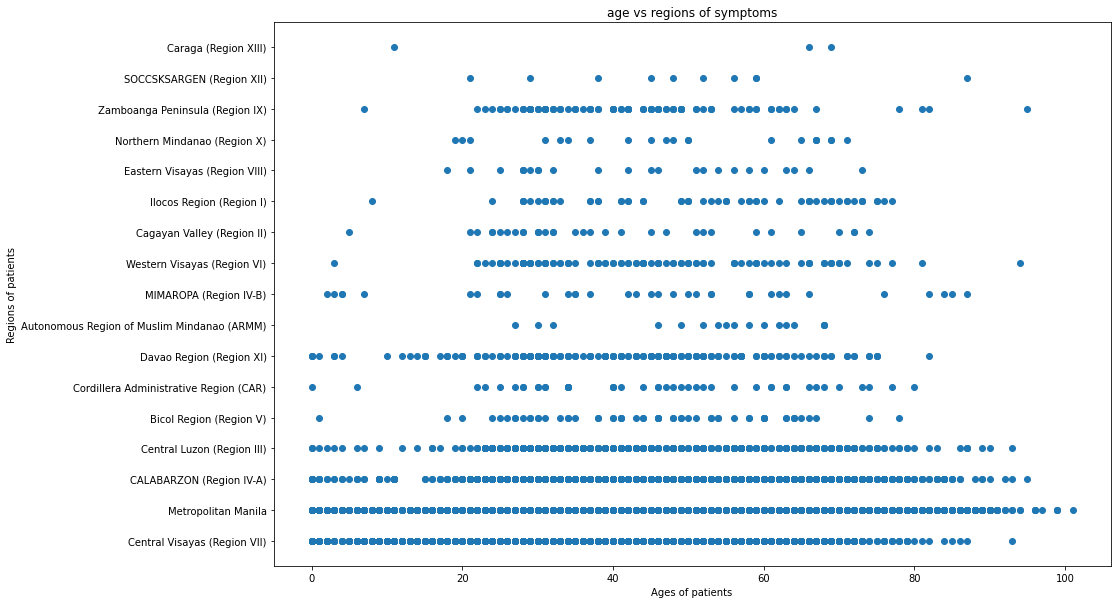

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
ax = plt.axes()
ax.scatter(data.age, data.region)

ax.set(xlabel = 'Ages of patients', ylabel='Regions of patients', title = "age vs regions of symptoms")

* The least number of patients of any age that are affected by Covid (according to the scatter plot) are those who live in the Caraga Region. 
* The Autonomous Region of Muslim Mindanao, Eastern Visayas, and Norther Mindanao regions are the ones that sees the least amount of children infected with COVID

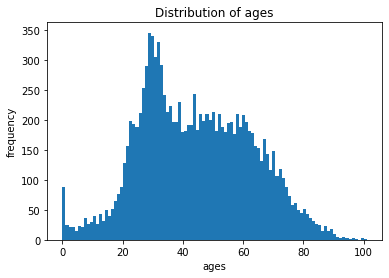

In [10]:
#histogram

ax = plt.axes()
ax.hist(data.age, bins = 100)

ax.set(xlabel='ages', 
       ylabel='frequency',
       title='Distribution of ages');

In [11]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


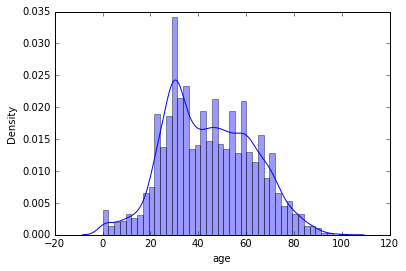

In [12]:
sns.distplot(data['age'])

* We can conclude from the histogram that the ages that are mostly affected with COVID are those who are in and are close to their mid-20s

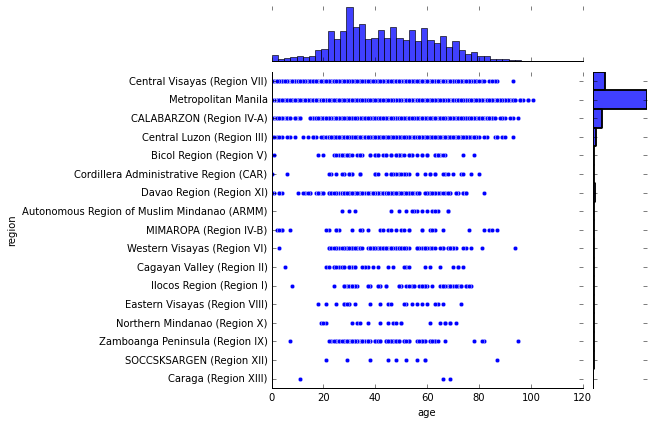

In [13]:
  sns.jointplot(x='age', y='region', data = data, kind = 'scatter')

* the scatter plot above is similar to our scatter plot previously, but this time you can clearly see which region has the highest number of infections across all ages, as seen in the distribution graph of regions to the right side

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


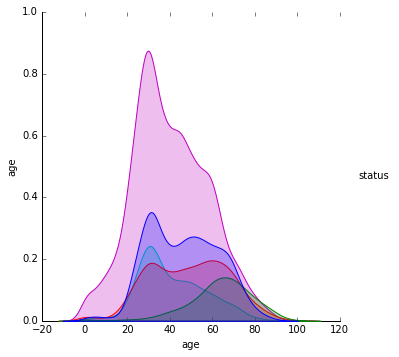

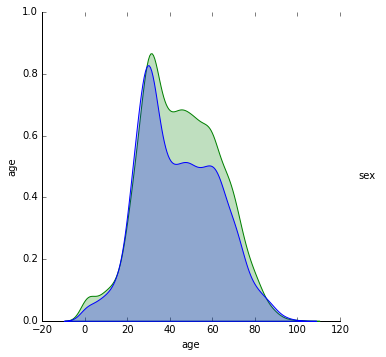

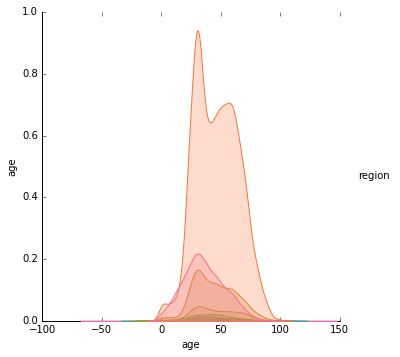

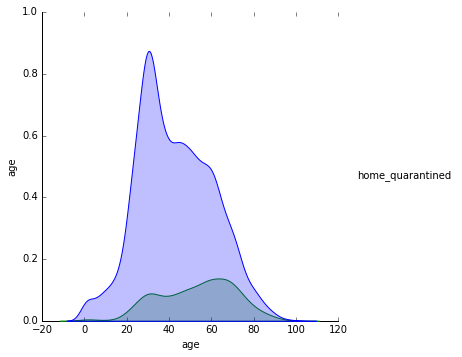

In [14]:
sns.pairplot(data,hue='status', size = 5)
sns.pairplot(data, hue='sex',size = 5)
sns.pairplot(data, hue='region',size = 5)
sns.pairplot(data, hue='home_quarantined', size = 5)


* pairwise plotting is supposed to show us the categorical values and their relationship with numerical values... while it does seem to work, the legend for which color represents which categorical value is not lister as it should

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


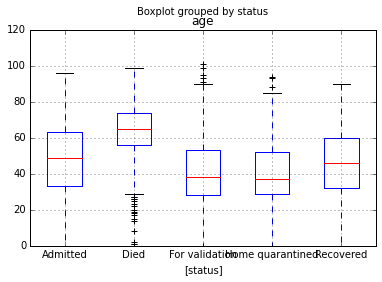

In [15]:
#boxplot
data.boxplot(by = 'status')

* the box plot shows us that there seems to be a lot of outliers for the persons who have died. This makes sense since we know that usually people who are younger mid or below 20 have better chances at rcovering from Covid than older folks. The boxplot reveals that the data may be inaccurate. Also, there are outliers in the box-plot for older folks who are home-quarantined. This may be due to the fact that most older folks dob't get to home quarantine since they are likely to be severely affected by COVID and thus need to me admitted to ICUs. 

# Line-Graph for date_announced (***NOT YET FINISHED***)
* purpose: see if the dates the hospital announced the patients as positve have anything to do with holidays or specic events corresponsing to specific dates that may have made these patienst more susceptible to being infected due to movement of people and their involvment to go out in public.




# Use Chloropleth to derive Geographical Information about the COVID dataset


In [16]:
!pip install mapclassify
!pip install geoplot

     |████████████████████████████████| 12.1MB 8.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0MB 34.4MB/s 
     |████████████████████████████████| 225kB 43.7MB/s 
     |████████████████████████████████| 19.3MB 243kB/s 
     |████████████████████████████████| 15.4MB 286kB/s 
     |████████████████████████████████| 6.6MB 31.6MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516153 sha256=7686ee9aa5abae0b01576e9def60bbe4e70f9b6917726b1a1569d57ddad26975
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37325 sha256=648eeb4a494b4bc5b05fbc9148b32b4c3cd05afc532facd25756e41f84d47a85
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf826

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors #to customize our colormap for legend
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import geopandas as gpd
import descartes #important for integrating Shapely Geometry with the Matplotlib Library
import mapclassify #You will need this to implement a Choropleth
import geoplot #You will need this to implement a Choropleth
%matplotlib inline

In [21]:
# Load the .sh file from gadm.rog
# Note that we will later load another .sh file from a different site 
# since gadm.org does not seem to contain administrative-level for
# regions.

country = gpd.GeoDataFrame.from_file('/content/drive/My Drive/Colab Notebooks/Module 5 Activities/Philippines_Geo_Outline/gadm36_PHL_0.shp')
provinces = gpd.GeoDataFrame.from_file('/content/drive/My Drive/Colab Notebooks/Module 5 Activities/Philippines_Geo_Outline/gadm36_PHL_1.shp')
cities = gpd.GeoDataFrame.from_file('/content/drive/My Drive/Colab Notebooks/Module 5 Activities/Philippines_Geo_Outline/gadm36_PHL_2.shp')
barangay = gpd.GeoDataFrame.from_file('/content/drive/My Drive/Colab Notebooks/Module 5 Activities/Philippines_Geo_Outline/gadm36_PHL_3.shp')

#here load the Regions.sh files you got from philgis.org
regions_gis = gpd.GeoDataFrame.from_file('/content/drive/My Drive/Colab Notebooks/Module 5 Activities/Regions_GIS/Regions.shp')

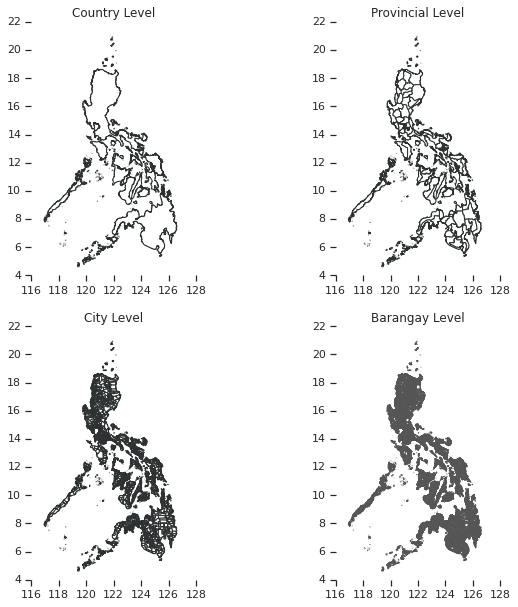

In [22]:
# figures using .shp files derived from gadm.org
# the maps have the country, provincial, city, and barangay levels

fig, axes = plt.subplots(2,2,figsize = (10,10)) #2,2 means 2 rows and 2 columns whic means 4 cells that can be used as subplots

# the ax=axes[n][m] denotes which object in axes list, 
# [[object1 at <> object2 at <>],[object3 at <> object4 at <>] ....]
# will be chosen, and consequently the position of the resulting map

country.plot(ax=axes[0][0], color='white', edgecolor = '#2e3131');
provinces.plot(ax=axes[0][1], color='white', edgecolor = '#2e3131');
cities.plot(ax=axes[1][0], color='white', edgecolor = '#2e3131');
barangay.plot(ax=axes[1][1], color='white', edgecolor = '#555555');

adm_lvl = ["Country Level", "Provincial Level", "City Level", "Barangay Level"]

i = 0
for ax in axes:
    for axx in ax:        
        axx.set_title(adm_lvl[i])
        i = i+1
        axx.spines['top'].set_visible(False)
        axx.spines['right'].set_visible(False)
        axx.spines['bottom'].set_visible(False)
        axx.spines['left'].set_visible(False)

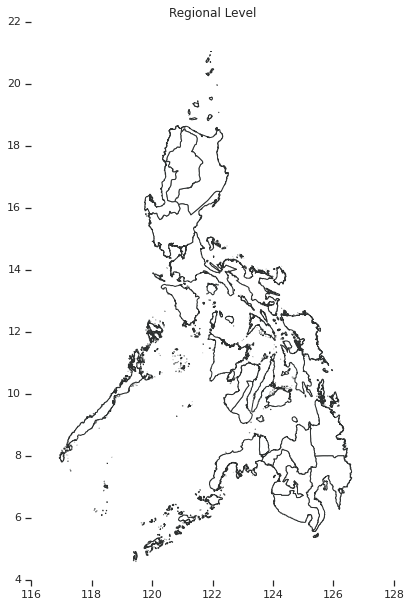

In [23]:
# since there seem to not have any regional levels we will go ahead and 
# try to do this exercise using the .shp files we got from
# philgis.org

fig, axes = plt.subplots(1,1,figsize = (10,10)) # the 1 and 1 represents 1 row and 1 column. The cell that you can get from that is one cell

regions_gis.plot(ax=axes, color='white', edgecolor = '#2e3131');

axes.set_title("Regional Level")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)


In [24]:
# For the sake of simplicity we wil be creating a dataframe that 
# will give us the amount of infected patients in a given region.
# Using their ages that will highlight a certain area on a map
# does not make any sense. We could try and treat these areas like percentage shapes
# where the filling out of the areas with colors will represent
# each percentage of patient of a certain age AND  who lives there 
# BUT that would be laborious. At the moment I am merely interested in 
# finding out regions and their reported infected population. 

# begin preprocessing

r = list(regions_gis['REGION'])
r = sorted(r)

for i in sorted(data.region.unique()):
  if i in r:
    continue
  else:
    print(i+'not the same')
  
# Create a list that corresponds to the number of infected persons in the 
# list of regions in r
region_occur = []

for i in r:
  region_occur.append((data['region'] == i).value_counts()[1])

# create the data frame for the rows that have regions and their respective
# infected number of persons and call that datafram 'data_regions'

data_regions = pd.DataFrame(list(zip(r, region_occur)), columns = ['regions','infected'])
data_regions

,regions,infected
0,Autonomous Region of Muslim Mindanao (ARMM),17
1,Bicol Region (Region V),59
2,CALABARZON (Region IV-A),1327
3,Cagayan Valley (Region II),33
4,Caraga (Region XIII),3
5,Central Luzon (Region III),401
6,Central Visayas (Region VII),1750
7,Cordillera Administrative Region (CAR),45
8,Davao Region (Region XI),191
9,Eastern Visayas (Region VIII),24


In [25]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7097 sha256=0eece23109d6c6d795cb278effbb58a06a77e31f502cc11a5e9853a4d776170d
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


16

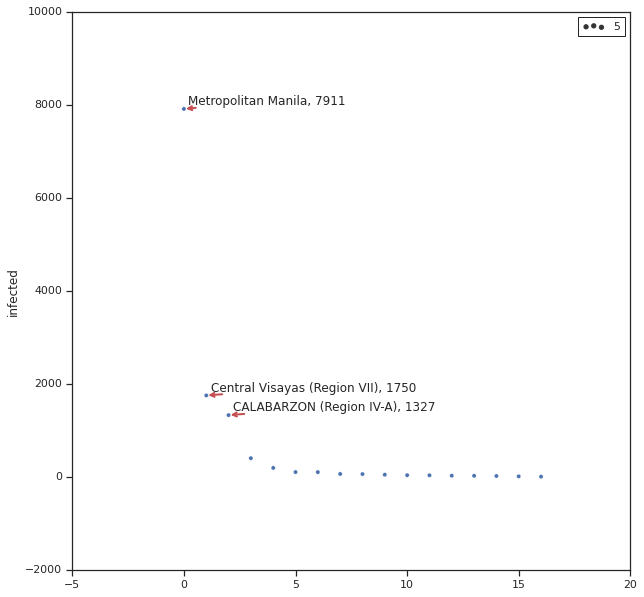

In [26]:
df_sorted = data_regions.sort_values("infected", ascending=False, ignore_index=True)
fig, ax = plt.subplots(figsize=(10,10)) 
scatter = sns.scatterplot(x=df_sorted.index, y = df_sorted.infected, size = 5)

# ax is the y and x axis and fig is the figure in the plot
# inital use of df_sorted sees that all data points are plotted in the graph
# using line 3

df_sorted = data_regions.sort_values("infected", ascending=False, ignore_index=True)[:3]

# df_sorted is reduced to [:3] or three datapoints so as to only have those included in the 
# labelling below so as to reduce crowding of annotations

from adjustText import adjust_text #used so that annotations don't overlap

texts = [ax.text(p[0], p[1], "{}, {}".format(df_sorted.regions.loc[p[0]], p[1]), size='large')for p in zip(df_sorted.index, df_sorted.infected)]
adjust_text(texts, arrowprops = dict(arrowstyle='->', color='r', lw=2), precision =0.001)


In [63]:
#merge data_region ans region_gis
m = data_regions.merge(regions_gis, left_on = "regions", right_on = 'REGION', how="outer")
m

,regions,infected,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),17,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,Bicol Region (Region V),59,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,CALABARZON (Region IV-A),1327,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,Cagayan Valley (Region II),33,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,Caraga (Region XIII),3,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."
5,Central Luzon (Region III),401,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."
6,Central Visayas (Region VII),1750,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
7,Cordillera Administrative Region (CAR),45,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939..."
8,Davao Region (Region XI),191,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5..."
9,Eastern Visayas (Region VIII),24,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9..."


In [67]:
#transform m into a geoDataFrame
m = gpd.GeoDataFrame(m, crs ="EPSG:4326")

#make sure that there are no duplicate indices and that the indices are resetted 
y = m.reset_index(drop = True)
y

,regions,infected,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),17,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,Bicol Region (Region V),59,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,CALABARZON (Region IV-A),1327,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,Cagayan Valley (Region II),33,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,Caraga (Region XIII),3,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."
5,Central Luzon (Region III),401,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."
6,Central Visayas (Region VII),1750,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
7,Cordillera Administrative Region (CAR),45,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939..."
8,Davao Region (Region XI),191,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5..."
9,Eastern Visayas (Region VIII),24,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9..."


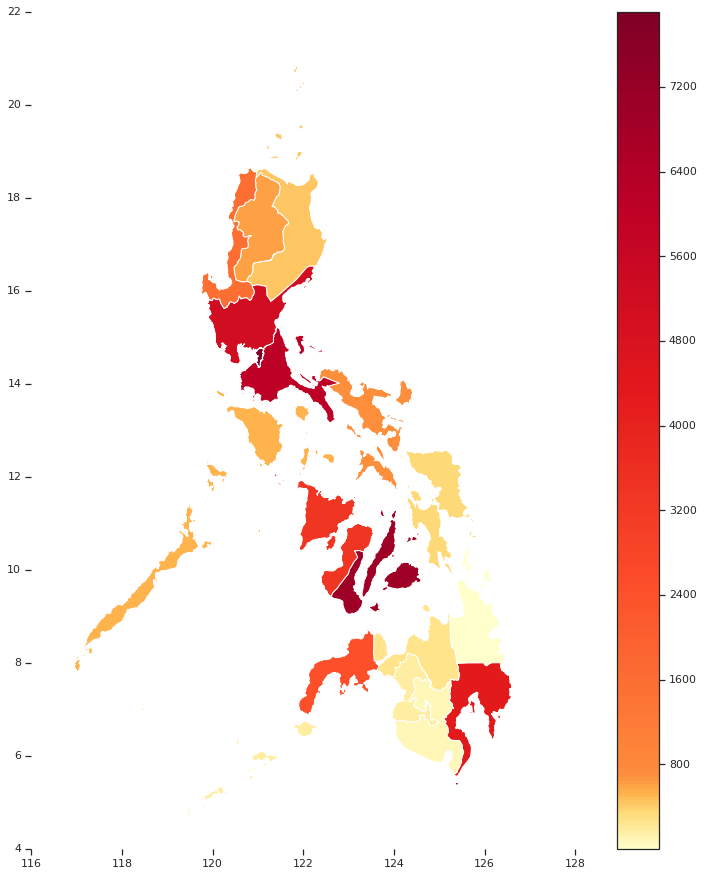

In [80]:
#visualizing the geo frame, 'y', that we created

k = 1600
cmap = "YlOrRd"
figsize = (15,15)
scheme = 'Quantiles'

ax = y.plot(column = 'infected', cmap=cmap, figsize = figsize, scheme=scheme, k=k, legend= False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

vmin, vmax, vcenter = y.infected.min(), y.infected.max(), y.infected.mean()
divnorm = colors.TwoSlopeNorm (vmin=vmin, vcenter=vcenter, vmax=vmax)

cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
fig.colorbar(cbar, ax=ax)


**Note**
*   The choloropleth does not have any indication as to which region is which.

* The redder the shade the higher the amount of infected; the lighter the shade, the lesser.

* Recommendation: more labels, legend, interaction interface (on hover -> show population and name of region)



#### Conclusion

In conclusion, this exercise was difficult for me to create because I don't have a lot of experience with using modules in Python to create graphs and other visuals. However, I do understand that this part of Data Science, which is Data Visualization, is VERY VERY Important for me to become a successful data scientist. This exercise helped me foster my skills in data visualization. One thing I noticed is that in Exploratory Data Analysis, one must really be insightful and knowledgable about Statistics so one can properly determine which models to use to represent your data. I think I am going to have to learn statistics all over again.